# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module I:** Default Analysis
#### Topic:  Clasification with Linear Discriminant Analysis

##### Name: Julio César Avila Torreblanca

- **Objective**: apply linear discriminant analysis to a default classification problem.

- **Contents**:
    - Notes:
        - LDA Algorithm
    - Code:
        1. Libraries and parameters
        2. Read Data
        3. EDA
        4. Modeling
        5. Evaluation
        6. Conclusions

----


# Class Nontes: Linear Discriminant Analysis for Default Classification

### Introduction to Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a supervised machine learning algorithm that is primarily used for classification purposes. It seeks to find a linear combination of features that characterizes or separates two or more classes (in this case, defaulters and non-defaulters).

### Purpose of LDA in Default Classification

In the context of financial applications, LDA can be employed to classify whether a client will default or not on a loan based on historical data. The algorithm helps in reducing dimensionality while preserving as much class discriminatory information as possible.

### Mathematical Formulation

LDA works by modeling the difference between the classes as linear equations. It aims to maximize the ratio of between-class variance to the within-class variance, thereby ensuring maximum separability. The mathematical formulation involves:

1. Compute the mean vectors for each class.
2. Compute the within-class scatter matrix ($S_W$):

$$S_W = \sum_{i=1}^{c} \sum_{x \in D_i} (x - \mu_i)(x - \mu_i)^T$$

3. Compute the between-class scatter matrix ($S_B$):
$$S_B = \sum_{i=1}^{c} N_i (\mu_i - \mu)(\mu_i - \mu)^T$$

4. Solve the generalized eigenvalue problem for the matrix ($S_W^{-1}S_B$).

The solution of this problem gives us the linear discriminant coefficients.

### Implementation Steps

1. Standardize the dataset.
2. Compute the LDA components.
3. Project the data onto the LDA components.
4. Use the projections for classification.

### Advantages of LDA

- **Dimensionality Reduction**: LDA can reduce the number of features needed while retaining the class discriminatory information.
- **Computationally Efficient**: Compared to other classification methods like SVM and neural networks, LDA is relatively fast.
- **Interpretability**: The linear combinations of features are easy to interpret.
- **Captures Class Covariance**: Takes into account the covariance between the different classes.

### Disadvantages of LDA

- **Assumption of Normality**: LDA assumes that data is normally distributed, which may not hold true in many real-world applications.
- **Linearity Assumption**: It assumes linear decision boundaries, which may not capture complex relationships well.
- **Sensitive to Outliers**: Being based on the mean, LDA is sensitive to outliers which can mislead the results.
- **Not Suitable for Non-Gaussian Distributions**: If the Gaussian assumption is seriously violated, LDA will perform poorly.

---


# Coding

# 1. Libraries and Parameters

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

import plotly.express as px

# 2. Data reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Cruso-ApsFinancieras/semana1/lending_clubFull_Data_Set.xlsx", index_col=0)
df

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,B1,Schneider Electric,5 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,C1,Clark County School District,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,C2,sales consultant,< 1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24998,1043529,98124387,12200.0,60 months,13.49,280.66,C,C2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


# 3. EDA

## 3.1 Miss values

In [4]:
df.isna().sum().sort_values()

,0
id,0
member_id,0
initial_list_status,1
last_fico_range_low,1
revol_bal,1
...,...
hardship_status,24904
hardship_reason,24904
hardship_type,24904
deferral_term,24904


In [5]:
na_values = (df.isna().sum().sort_values() / len(df)).reset_index(name = 'n')
na_values

,index,n
0,id,0.00000
1,member_id,0.00000
2,initial_list_status,0.00004
3,last_fico_range_low,0.00004
4,revol_bal,0.00004
...,...,...
129,hardship_status,0.99616
130,hardship_reason,0.99616
131,hardship_type,0.99616
132,deferral_term,0.99616


In [6]:
aux = na_values[na_values['n']>0.1]
aux

,index,n
76,mths_since_recent_inq,0.13516
77,next_pymnt_d,0.49164
78,mths_since_last_delinq,0.49172
79,open_acc_6m,0.52096
80,open_act_il,0.52096
81,inq_last_12m,0.52096
82,open_il_12m,0.52096
83,open_il_24m,0.52096
84,total_bal_il,0.52096
85,open_rv_24m,0.52096


In [7]:
columns_to_drop = list(aux['index'])
columns_to_drop

['mths_since_recent_inq',
 'next_pymnt_d',
 'mths_since_last_delinq',
 'open_acc_6m',
 'open_act_il',
 'inq_last_12m',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'open_rv_24m',
 'max_bal_bc',
 'inq_fi',
 'total_cu_tl',
 'open_rv_12m',
 'all_util',
 'mths_since_rcnt_il',
 'il_util',
 'mths_since_recent_revol_delinq',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_last_record',
 'desc',
 'dti_joint',
 'verification_status_joint',
 'annual_inc_joint',
 'sec_app_open_act_il',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_num_rev_accts',
 'sec_app_open_acc',
 'sec_app_fico_range_high',
 'sec_app_inq_last_6mths',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_low',
 'revol_bal_joint',
 'sec_app_mort_acc',
 'sec_app_revol_util',
 'settlement_amount',
 'settlement_status',
 'settlement_date',
 'debt_settlement_flag_date',
 'settlement_percentage',
 'settlement_term',
 'sec_app_mths_since_last_major_derog',
 'hardship_

In [ ]:
len(columns_to_drop)

58

In [8]:
px.bar(na_values, "index", "n")

In [9]:
df_clean = df.drop(columns=columns_to_drop)
df_clean

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,1.0,90.0,25.0,1.0,0.0,116075.0,69594.0,27500.0,83175.0,N
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,1.0,100.0,50.0,0.0,0.0,116920.0,74939.0,19700.0,78020.0,N
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,3.0,80.0,50.0,0.0,0.0,39547.0,16824.0,11200.0,25547.0,N
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,0.0,60.0,100.0,0.0,0.0,104310.0,7582.0,3300.0,13015.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,B1,Schneider Electric,5 years,...,1.0,96.0,25.0,0.0,0.0,263503.0,40380.0,13000.0,33279.0,N
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,C1,Clark County School District,10+ years,...,3.0,100.0,40.0,0.0,0.0,64327.0,64497.0,5400.0,51027.0,N
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,C2,sales consultant,< 1 year,...,1.0,90.2,33.3,0.0,0.0,183700.0,22014.0,3600.0,0.0,N
24998,1043529,98124387,12200.0,60 months,13.49,280.66,C,C2,NaN,NaN,...,2.0,100.0,33.3,0.0,0.0,22500.0,13615.0,20000.0,1000.0,N


## 3.2 Analysis by dtype

In [11]:
print("Original data")
print(df.dtypes.value_counts())
print('-'*50)
print("Clean data")
print(df_clean.dtypes.value_counts())

Original data
float64           100
object             24
datetime64[ns]      9
int64               1
Name: count, dtype: int64
--------------------------------------------------
Clean data
float64           56
object            17
datetime64[ns]     2
int64              1
Name: count, dtype: int64


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          25000 non-null  int64         
 1   member_id                   25000 non-null  object        
 2   loan_amnt                   24999 non-null  float64       
 3   term                        24999 non-null  object        
 4   int_rate                    24999 non-null  float64       
 5   installment                 24999 non-null  float64       
 6   grade                       24999 non-null  object        
 7   sub_grade                   24999 non-null  object        
 8   emp_title                   23394 non-null  object        
 9   emp_length                  23498 non-null  object        
 10  home_ownership              24999 non-null  object        
 11  annual_inc                  24999 non-null  float64       


In [50]:
columns_by_type = (df_clean.columns.to_series()).groupby(df_clean.dtypes).groups
columns_by_type = {k.name: [str(x) for x in v] for k, v in columns_by_type.items()}
columns_by_type

{'int64': ['id'],
 'float64': ['loan_amnt',
  'int_rate',
  'installment',
  'annual_inc',
  'dti',
  'delinq_2yrs',
  'fico_range_low',
  'fico_range_high',
  'inq_last_6mths',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_acc',
  'last_fico_range_high',
  'last_fico_range_low',
  'collections_12_mths_ex_med',
  'policy_code',
  'acc_now_delinq',
  'tot_coll_amt',
  'tot_cur_bal',
  'total_rev_hi_lim',
  'acc_open_past_24mths',
  'avg_cur_bal',
  'bc_open_to_buy',
  'bc_util',
  'chargeoff_within_12_mths',
  'delinq_amnt',
  'mo_sin_old_il_acct',
  'mo_sin_old_rev_tl_op',
  'mo_sin_rcnt_rev_tl_op',
  'mo_sin_rcnt_tl',
  'mort_acc',
  'mths_since_recent_bc',
  'num_accts_ever_120_pd',
  'num_actv_bc_tl',
  'num_actv_rev_tl',
  'num_bc_sats',
  'num_bc_tl',
  'num_il_tl',
  'num_op_rev_tl',
  'num_rev_accts',
  'num_rev_tl_bal_gt_0',
  'num_sats',
  'num_tl_120dpd_2m',
  'num_tl_30dpd',
  'num_tl_90g_dpd_24m',
  'num_tl_op_past_12m',
  'pct_tl_nvr_dlq',
  'percent_b

### Target **definition**

In [13]:
# target
df_clean['loan_status'].value_counts(dropna = False)

,count
loan_status,
Current,12063
Fully Paid,9733
Charged Off,2557
Late (31-120 days),336
In Grace Period,174
Late (16-30 days),101
Does not meet the credit policy. Status:Fully Paid,28
Does not meet the credit policy. Status:Charged Off,5
Default,2


In [65]:
loan_status_to_objective = {
    "Current": 0,
    "Fully Paid": 0,
    "Charged Off": 1,
    "Late (31-120 days)": 0,
    "In Grace Period": 0,
    "Late (16-30 days)": 0,
    "Default": 1,
}

X = df_clean.drop(columns=['loan_status'], axis=1)

# map target values
y = df_clean['loan_status'].map(loan_status_to_objective)

# clean null values in target
X = X[~y.isna()]
y = y[~y.isna()]
print(X.shape, y.shape)
y.dtype

(24966, 75) (24966,)


dtype('float64')

In [66]:
# balance
y.value_counts()

,count
loan_status,
0.0,22407
1.0,2559


### Numerical features

In [67]:
# scaling
scaler = StandardScaler()
X_transformed = pd.DataFrame(
    scaler.fit_transform(X[columns_by_type['float64']]),
    columns = X[columns_by_type['float64']].columns,
    index = X[columns_by_type['float64']].index
)
X_transformed

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.605317,0.993653,-0.367401,-0.596320,-0.010158,-0.371036,-0.179070,-0.179072,-0.670214,-1.023591,...,NaN,NaN,NaN,NaN,-0.354315,-0.150416,NaN,NaN,NaN,NaN
1,1.746445,-0.258666,2.184865,1.071667,0.143614,2.924724,-0.818995,-0.818968,0.425710,0.062645,...,1.717029,-0.601370,-0.424478,-0.581503,2.256547,-0.150416,-0.338577,0.393019,0.258360,0.913034
2,0.776486,-0.258666,1.082158,-0.492707,0.783621,-0.371036,1.260759,1.260696,0.425710,0.243684,...,-0.174699,-0.601370,0.679972,0.112846,-0.354315,-0.150416,-0.333818,0.505343,-0.099859,0.795501
3,-0.535811,0.095525,-0.378183,-0.230765,-0.137590,2.924724,-0.659013,-0.658994,-0.670214,-0.480473,...,-0.174699,0.503440,-1.528929,0.112846,-0.354315,-0.150416,-0.769582,-0.715934,-0.490226,-0.400873
4,-1.106375,-0.996564,-1.090559,0.198528,-0.946320,-0.371036,-1.138957,-1.138917,-0.670214,-1.385669,...,-0.174699,-1.153775,-3.737829,1.501543,-0.354315,-0.150416,-0.404837,-0.910153,-0.853038,-0.686600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.478755,-0.644481,-0.380449,0.016624,-0.643046,-0.371036,-0.339051,-0.339046,0.425710,-0.118394,...,-0.174699,-0.601370,0.238192,-0.581503,-0.354315,-0.150416,0.491736,-0.220909,-0.407560,-0.224585
24996,-0.307585,0.234672,-0.097389,0.089385,-0.488562,-0.371036,-0.179070,-0.179072,0.425710,0.243684,...,-0.174699,0.503440,0.679972,-0.164894,-0.354315,-0.150416,-0.630021,0.285906,-0.756594,0.180066
24997,1.175881,-0.111086,1.568977,-0.310803,-0.375368,0.727551,-0.978976,-0.978942,0.425710,0.062645,...,-0.174699,-0.601370,-0.402389,-0.350979,-0.354315,-0.150416,0.042286,-0.606867,-0.839260,-0.983339
24998,-0.284763,0.057576,-0.610693,-0.594573,-0.571144,-0.371036,-0.019089,-0.019097,-0.670214,-1.204630,...,-0.174699,-0.048965,0.679972,-0.350979,-0.354315,-0.150416,-0.865590,-0.783371,-0.086081,-0.960540


In [68]:
# high correlation
numeric_to_remove = []

df_corr = X_transformed.corr()
px.imshow(df_corr,
          labels=dict(color="Correlación"),
          range_color=[-1, 1],
          )


In [69]:
# threshold 0.7
correlated_features = set()

for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > 0.7:
            colname = df_corr.columns[i]
            correlated_features.add(colname)
len(correlated_features)

20

In [70]:
correlated_features

{'avg_cur_bal',
 'bc_util',
 'fico_range_high',
 'installment',
 'last_fico_range_low',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_rev_hi_lim'}

In [71]:
X_transformed.drop(columns=correlated_features, inplace=True)

In [72]:
X_transformed.dtypes.unique()

array([dtype('float64')], dtype=object)

### Dates

In [73]:
for col in columns_by_type['datetime64[ns]']:
    print(df_clean[col].head())
    print('-'*50)

0   1995-11-01
1   2003-10-01
2   1999-10-01
3   1983-11-01
4   2000-04-01
Name: earliest_cr_line, dtype: datetime64[ns]
--------------------------------------------------
0   2016-10-01
1   2017-12-01
2   2017-03-01
3   2017-12-01
4   2017-12-01
Name: last_credit_pull_d, dtype: datetime64[ns]
--------------------------------------------------


In [74]:
X.drop(columns=columns_by_type["datetime64[ns]"], inplace=True)

### Categorical

In [79]:
columns_by_type["object"].remove("loan_status")
columns_by_type

['member_id',
 'term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'hardship_flag']

In [80]:
unique_values_by_column = X[columns_by_type["object"]] \
                            .nunique().reset_index(name = "n")
unique_values_by_column

,index,n
0,member_id,24966
1,term,2
2,grade,7
3,sub_grade,35
4,emp_title,13212
5,emp_length,11
6,home_ownership,6
7,verification_status,3
8,pymnt_plan,2
9,purpose,14


In [81]:
bpx.bar(data_frame = unique_values_by_column,
       x ="index",
       y = "n",
       title="Cantidad de niveles por factor",
       labels={
           "index": "Nombre de la variable",
           "n": "Número de niveles"
           }
       )

In [83]:
drop_columns = ['member_id', 'emp_title', 'title', 'zip_code']
drop_columns

['member_id', 'emp_title', 'title', 'zip_code']

In [87]:
X.drop(columns=drop_columns, inplace=True)

columns_by_type['object'] = list(set(columns_by_type['object']) - set(drop_columns))
columns_by_type['object']

['emp_length',
 'sub_grade',
 'purpose',
 'pymnt_plan',
 'verification_status',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'term',
 'addr_state',
 'hardship_flag']

In [88]:
X = pd.get_dummies(X, columns=columns_by_type['object'])
X

,id,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,hardship_flag_N,hardship_flag_Y
0,263591,20000.0,17.93,342.94,44304.0,18.47,0.0,690.0,694.0,0.0,...,True,False,False,False,False,False,False,False,True,False
1,1613916,30000.0,11.99,996.29,136000.0,20.63,3.0,670.0,674.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2,818934,21500.0,11.99,714.01,50000.0,29.62,0.0,735.0,739.0,1.0,...,True,False,False,False,False,False,False,False,True,False
3,1606612,10000.0,13.67,340.18,64400.0,16.68,3.0,675.0,679.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,1639932,5000.0,8.49,157.82,88000.0,5.32,0.0,660.0,664.0,0.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,10500.0,10.16,339.60,78000.0,9.58,0.0,685.0,689.0,1.0,...,False,False,False,False,False,False,False,False,True,False
24996,945413,12000.0,14.33,412.06,82000.0,11.75,0.0,690.0,694.0,1.0,...,False,False,False,False,False,False,False,False,True,False
24997,366944,25000.0,12.69,838.63,60000.0,13.34,1.0,665.0,669.0,1.0,...,False,False,False,False,False,False,False,False,True,False
24998,1043529,12200.0,13.49,280.66,44400.0,10.59,0.0,695.0,699.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [90]:
X.isnull().sum().sum()

32309

## 3.3 Null values

In [91]:
X_fact = X.fillna(0).drop(columns=["id"], axis=1)
X_fact

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,hardship_flag_N,hardship_flag_Y
0,20000.0,17.93,342.94,44304.0,18.47,0.0,690.0,694.0,0.0,6.0,...,True,False,False,False,False,False,False,False,True,False
1,30000.0,11.99,996.29,136000.0,20.63,3.0,670.0,674.0,1.0,12.0,...,False,False,False,False,False,False,False,False,True,False
2,21500.0,11.99,714.01,50000.0,29.62,0.0,735.0,739.0,1.0,13.0,...,True,False,False,False,False,False,False,False,True,False
3,10000.0,13.67,340.18,64400.0,16.68,3.0,675.0,679.0,0.0,9.0,...,False,False,False,False,False,False,False,False,True,False
4,5000.0,8.49,157.82,88000.0,5.32,0.0,660.0,664.0,0.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,10500.0,10.16,339.60,78000.0,9.58,0.0,685.0,689.0,1.0,11.0,...,False,False,False,False,False,False,False,False,True,False
24996,12000.0,14.33,412.06,82000.0,11.75,0.0,690.0,694.0,1.0,13.0,...,False,False,False,False,False,False,False,False,True,False
24997,25000.0,12.69,838.63,60000.0,13.34,1.0,665.0,669.0,1.0,12.0,...,False,False,False,False,False,False,False,False,True,False
24998,12200.0,13.49,280.66,44400.0,10.59,0.0,695.0,699.0,0.0,5.0,...,False,False,False,False,False,False,False,False,True,False


In [93]:
data_plot = pd.concat([X_fact, y], axis=1)
data_plot.loan_status = data_plot.loan_status + np.random.normal(0, .1, len(data_plot))

px.scatter(data_frame = data_plot,
           x = 'loan_status',
           y = 'last_fico_range_high',
           opacity = .5,
           title = 'last_fico_range_high vs. loan_status Tiene ruido para facilitar la visualización')


# 4. Modeling

In [94]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_fact, y,
    train_size = .7,
    random_state = 10,
    shuffle=True)


In [97]:
# model
lda = LinearDiscriminantAnalysis()
# train
clf = lda.fit(X_train, y_train)
# predictions
train_pred = lda.predict(X_train)
test_pred = lda.predict(X_test)

# 5. Model Evaluation

## 5.1 Model metrics

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Train metrics
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     15674
         1.0       0.71      0.66      0.69      1802

    accuracy                           0.94     17476
   macro avg       0.84      0.82      0.83     17476
weighted avg       0.94      0.94      0.94     17476

--------------------------------------------------


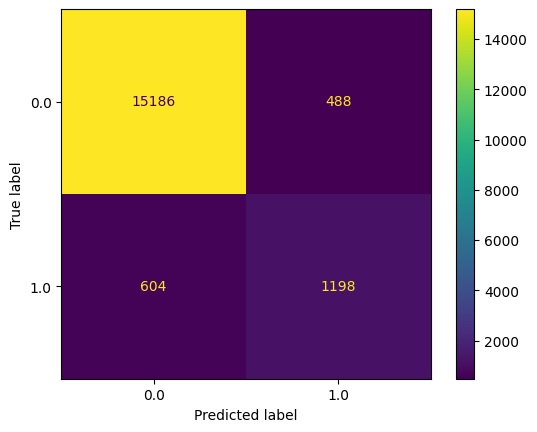

In [101]:
print('Train metrics')
print('-'*50)
print(classification_report(y_train, train_pred))
print('-'*50)
ConfusionMatrixDisplay.from_predictions(y_train, train_pred)

Test metrics
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6733
         1.0       0.67      0.64      0.65       757

    accuracy                           0.93      7490
   macro avg       0.81      0.80      0.81      7490
weighted avg       0.93      0.93      0.93      7490

--------------------------------------------------


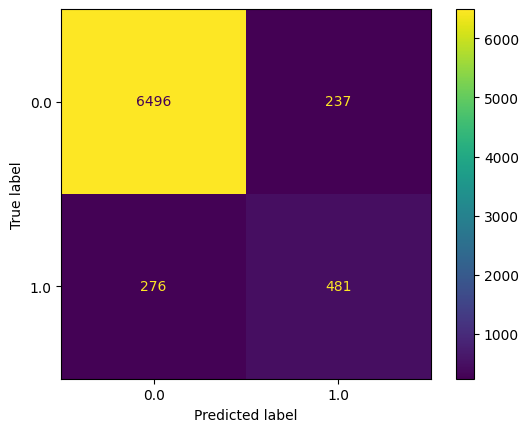

In [102]:
print('Test metrics')
print('-'*50)
print(classification_report(y_test, test_pred))
print('-'*50)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)

## 5.2 Interpretation

In [104]:
coef_df = pd.DataFrame(lda.coef_[0], X_train.columns, ["coef_"])
print(f'Intercept: {lda.intercept_}')
coef_df

Intercept: [9.77519832]


,coef_
loan_amnt,-0.000062
int_rate,-0.337744
installment,0.003190
annual_inc,-0.000003
dti,0.009506
...,...
addr_state_WI,-0.654496
addr_state_WV,0.720443
addr_state_WY,-0.677301
hardship_flag_N,0.780937


In [105]:
px.bar(coef_df.reset_index(), 'coef_', 'index')